<a href="https://colab.research.google.com/github/HanJaeHui-GitHub/ESAA/blob/main/ESAA_YB_Week12_markdown(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 12주차 과제_1122(금)

파이썬 머신러닝 완벽가이드 ch7. 1\~2 pg. 431~449

## K-평균 알고리즘 이해

**K-평균**

군집화(Clustering)에서 가장 일반적으로 사용되는 알고리즘

군집 중심점(centroid)이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법

군집 중심점은 선택된 포인트의 평균 지점으로 이동하고 이동된 중심점에서 다시 가까운 포인트를 선택한 후 다시 중심점을 평균 지점으로 이동하는 프로세스를 반복적으로 수행함.
모든 데이터 포인트에서 더 이상 중심점의 이동이 없을 경우에 반복을 멈추고 해당 중심점에 속하는 데이터 포인트들을 군집화함.

장점

- 일반적인 군집화에서 가장 많이 활용되는 알고리즘임

- 알고리즘이 쉽고 간결함

단점

- 거리 기반 알고리즘으로 속성 개수가 매우 많을 경우 군집화 정확도가 떨어짐(PCA로 차원 감소를 적용해야 할 수도 있음)

- 반복을 수행하는데 반복 횟수가 많을 경우 수행 시간이 매우 느려짐

- 몇 개의 군집(cluster)을 선택해야 할지 가이드하기 어려움

### 사이킷런 KMeans 클래스 소개

    class sklearn.cluster.KMeans(n_clusters = 8, init = 'k-means++', n_init = 10, max_iter = 300, tol = 0.001, precompute_distances = 'auto', verbose = 0, random_state = None, copy_x = True, n_jobs = 1, algorithm = 'auto')

- 가장 중요한 파라미터는 n_cluster이며 이는 군집화할 개수, 즉 군집 중심정의 개수를 의미

- int는 초기에 군집 중심점의 좌표를 설정할 방식을 말하며 보통은 임의로 중심을 설정하지 않고 일반적으로 k-means++ 방식으로 최초 설정함

- max_iter는 최대 반복 횟수이며 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료함

비지도학습 클래스와 마찬가지로 fit(데이터 세트) 또는 fit_transform(데이터 세트) 메서드를 이용해 수행한 후 군집화와 관련된 주요 속성을 알 수 있음

- labels : 각 데이터 포인트가 속한 군집 중심점 레이블

- cluster_centers_ : 각 군집 중심점 좌표(Shape는 [군집 개수, 피처 개수]), 이를 이용하면군집 중심점 좌표가 어디인지 시각화할 수 있음


### K-평균을 이용한 붓꽃 데이터 세트 군집화

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 더 편한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [2]:
# 붓꽃 데이터 세트를 3개 그룹으로 군집화하기
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [3]:
# labels_ 속성값을 출력
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [4]:
# 실제 붓꽃 품종 분류 값과 얼마나 차이가 나는지로 군집화가 효과적으로 됐는지 확인하기
# target 값을 'target' 칼럼으로 앞에서 구한 labels_값을 'cluster' 칼럼으로 지정
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          47
        2           3
2       0          14
        2          36
Name: sepal_length, dtype: int64


분류 타깃이 0값인 데이터는 1번 군집으로 잘 그루핑 됨

Target 1 값 데이터는 2개만 2번 군집으로 그루핑됐고 나머지 48개는 모두 0번 군집으로 그루핑됨.

Target 2값 데이터는 0번 군집에 14개, 2번 군집에 26개로 분산돼 그루핑됨.

In [5]:
# 붓꽃 데이터 세트의 군집화를 시각화하기
# 데이터 세트의 속성이 4개이므로 2차원 평면에 적합하게 PCA로 차원 축소 후 X,Y 좌표로 개별 데이터 표현
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


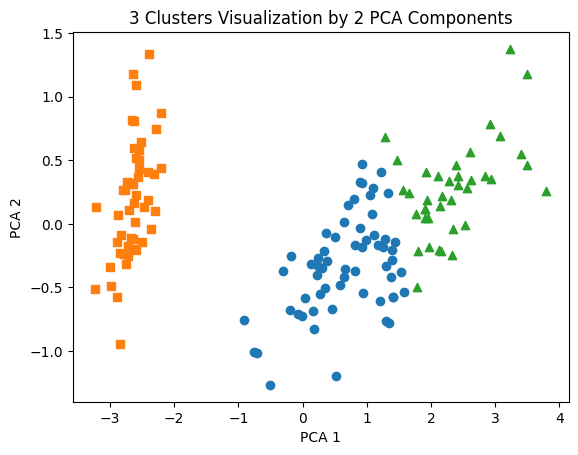

In [6]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 군집 레벨의 pca_x, pca_y 추출. o, s, ^로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

Cluster 1을 나타내는 네모는 잘 분리 되어 있으나 Cluster 0을 나타내는 동그라미와 Cluster 2를 나타내는 세모는 상당 수준 분리돼 있지만 네모만큼 명확하게 분리 되지 않음

## 군집화 알고리즘 테스트를 위한 데이터 생성

대표적인 군집화용 데이터 생성기

두 API는 비슷하게 여러 개의 클래스에 해당하는 데이터 세트를 만드는데 하나의 클래스에 여러 개의 군집이 분포될 수 있게 데이터를 생성할 수 있음

- make_blobs( ) : 개별 군집의 중심점과 표준 편차 제어 기능 추가

- make_classification( ) : 노이즈를 포함한 데이터를 만드는 데 유용하게 사용 가능

둘 다 분류 용도로도 테스트 데이터 생성 가능

이 외에도 make_circle( ), make_moon( )는 중심 기반의 군집화로 해결하기 어려운 데이터 세트 만드는데 사용

**make_blobs( )의 호출 파라미터**

- n_samples : 생성할 총 데이터 개수, 디폴트는 100개

- n_features : 데이터의 피처 개수, 시각화를 목표로 할 경우 2개로 설정해 보통 첫 번째 피처는 x, 두 번째 피처는 y 좌표상에 표현

- centers : int값 = 군집의 개수, ndarray 형태 = 개별 군집 중심점의 좌표 의미

- cluster_std : 생설될 군집 데이터의 표준 편차를 의미, 군집별로 같은 표준 편차를 설정할수도, 다른 표준 편차를 서정할 수 도 있음

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

# 총 200개의 레코드와 2개의 피처가 3개의 군집화 기반 분포도를 가진 피처 데이터 세트 X,
# 3개의 군집화 값을 가진 타깃 데이터 세트 y가 반환됨
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [8]:
# 편리한 데이터 가공을 위해 DataFrame으로 변환
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


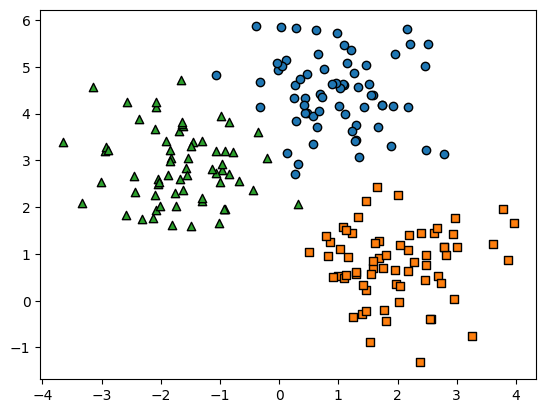

In [9]:
target_list = np.unique(y)

# 각 타깃 별 산점도의 마커 값
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']
# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0, 1, 2]
# target=0, target=1, target=2로 scatter plot을 marker별로 생성.
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k',
               marker=markers[target])
plt.show()

<ipython-input-10-fbbc435dc977>:19: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='' % label)


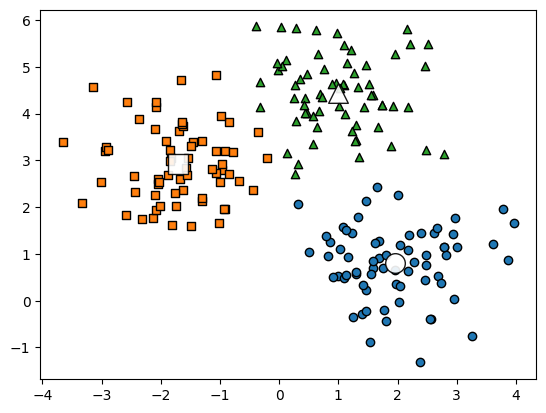

In [10]:
# KMeans 객체를 이용해 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF ['kmeans_label'] = cluster_labels

# cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행.
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

    # 군집별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='' % label)

plt.show()

In [12]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       2               66
        1                1
1       0               67
2       1               65
        0                1
Name: count, dtype: int64


Target 0이 cluster label 0으로, target 1이 label 2로 target 2가 label 1로 거의 대부분 잘 매핑됨

cluster_std가 0.4, 0.8, 1.2, 1.6일 때의 데이터를 시각화한 것

cluster_std가 작을수록 군집 중심에 데이터가 모여 있으며 클수록 퍼져있음

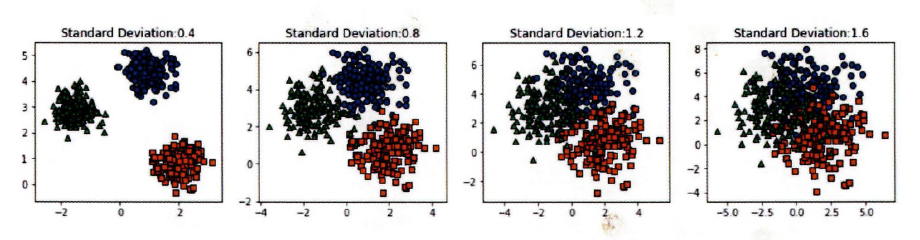

## 군집 평가(CLuster Evaluation)

### 실루엣 분석의 개요

군집화 평가 방법으로 실루엣 분석(silhouette analysis)가 있음

- 실루엣 분석 : 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타냄

    효율적으로 잘 분리됨 = 다른 군집과의 거리는 떨어져 있고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐져 있는 것

실루엣 분석은 실루엣 계수(sillhouette coefficient)를 기반으로 함

- 실루엣 계수 : 개별 데이터가 가지는 군집화 지표로 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화돼 있고 다른 군집에 있는 데이터와는 얼마나 멀리 분리돼 있는지를 나타내는 지표

    -1에서 1 사이의 값을 가짐

    1에 가까움  : 근처의 군집과 더 멀리 떨어져 있다는 것

    0에 가까움 :  근처의 군집과 가까워진다는 것

    \- 값은 아예 다른 군집에 데이터 포인트가 할당됨을 의미

    - a(i) : 해당 데이터 포인트와 같은 군집 내에 있는 다른 데이터 포인트와의 거리를 평균한 값

    - b(i) : 해당 데이터 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균 거리

    - 정규화하기 위해 MAX(a(i),b(i)) 값으로 나눔
    
$$s(i)=\frac{(b(i)-a(i))}{max(a(i),b(i))}$$

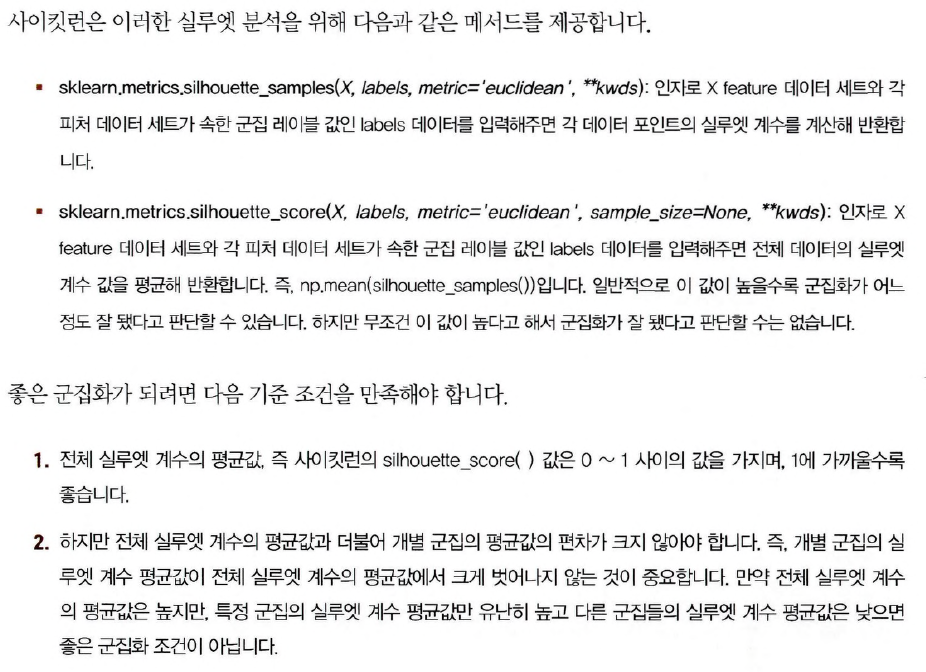

### 붓꽃 데이터 세트를 이용한 군집 평가

In [13]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

# iris 모든 개별 데이터에 실루엣 계수 값을 구함.
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples( ) return 값의 shape', score_samples.shape)

# irisDF에 실루엣 계수 칼럼 추가
irisDF ['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수 값을 구함.
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score {0:.3f}'.format(average_score))
irisDF.head(3)

silhouette_samples( ) return 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score 0.551


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852582
1,4.9,3.0,1.4,0.2,1,0.814916
2,4.7,3.2,1.3,0.2,1,0.828797


평균 실루엣 계수 값 = 약 0.553

irisDF의 맨 처음 3개 로우는 1번 군집에 해당하고 개별 실루엣 계수 값이 0.8529, 0.8154, 0.8293일 정도로 1번 군집의 경우 평균적으로 약 0.8 정도의 높은 실루엣 계수 값을 나타냄

다른 군집의 경우 실루엣 계수 값이 낮기 때문에 전체 평균 실루엣 계수 값이 0.553 정도가 됨

In [14]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

,silhouette_coeff
cluster,
0,0.422323
1,0.797604
2,0.436842


0,2번 군집의 평균값이 1번 군집에 비해 낮음

### 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법

전체 데이터의 평균 실루엣 계수 값이 높아고 해서 반드시 최적의 군집 개수로 군집화가 잘 됐다고 볼 수 없음

특정 군집 내의 실루엣 계수 값만 너무 높고 다른 군집은 내부 데이터끼리의 거리가 너무 떨어져 있어 실루엣 계수 값이 낮아져도 평균적으로 높은 값을 가질 수 있기 때문!!

1. 군집의 개수가 2개일 때

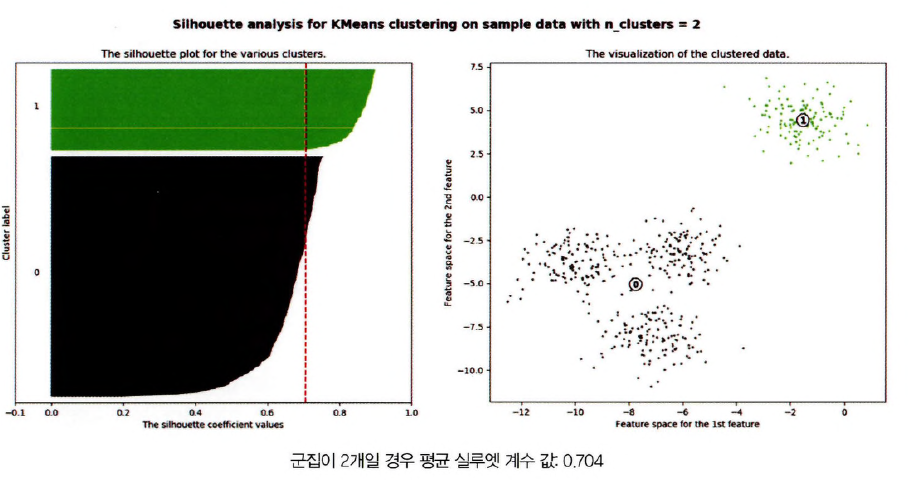

1번 군집의 경우는 0번 군집과 멀리 떨어져 있고 내부 데이터끼리도 잘 뭉쳐 있지만 0번 군집의 경우는 내부 데이터끼리 많이 떨어져 있음
 → 최적의 방법이라고 할 수 없음

2. 군집 개수가 3개일 때

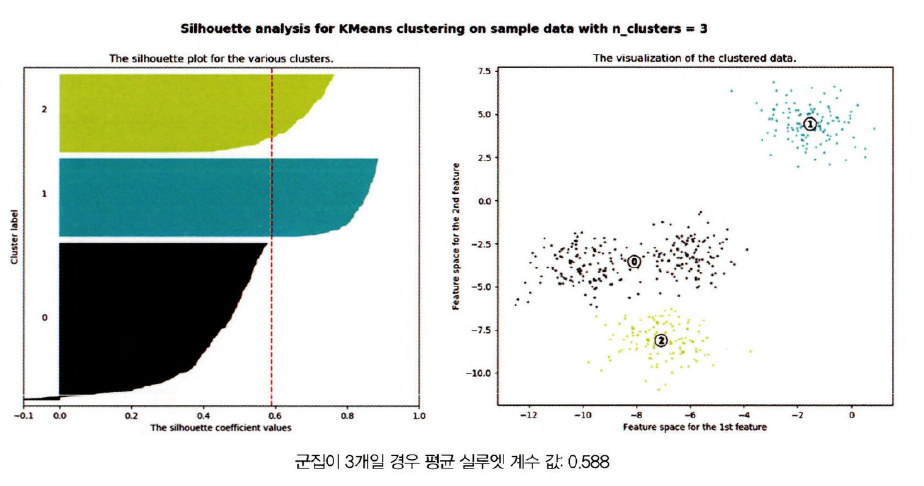

1,2번 군집의 경우 평균보다 높은 실루엣 계수 값을 가지고 있지만 0번의 경우 모두 평균보다 낮음

0번의 경우 내부 데이터 간의 거리도 멀지만 2번 군집과도 가깝게 위치

3. 군집이 4개인 경우

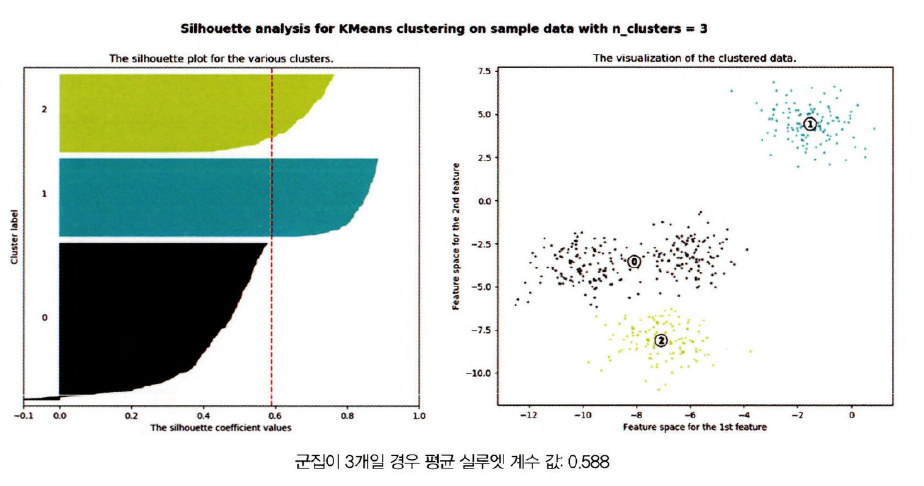

군집이 2개인 경우보다는 평균 실루엣 계수 값이 작지만 4개인 경우가 가장 이상적인 군집화 개수로 판단 가능함

피처 데이터 세트 X_features에 대해 군집이 2개, 3개, 4개, 5개일 때의 군집별 평균 실루엣 계수 값을 알고 싶다면 다음과 같이 호출하면 됨

    visualize_silhouette([2,3,4,5], X_features)

In [16]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

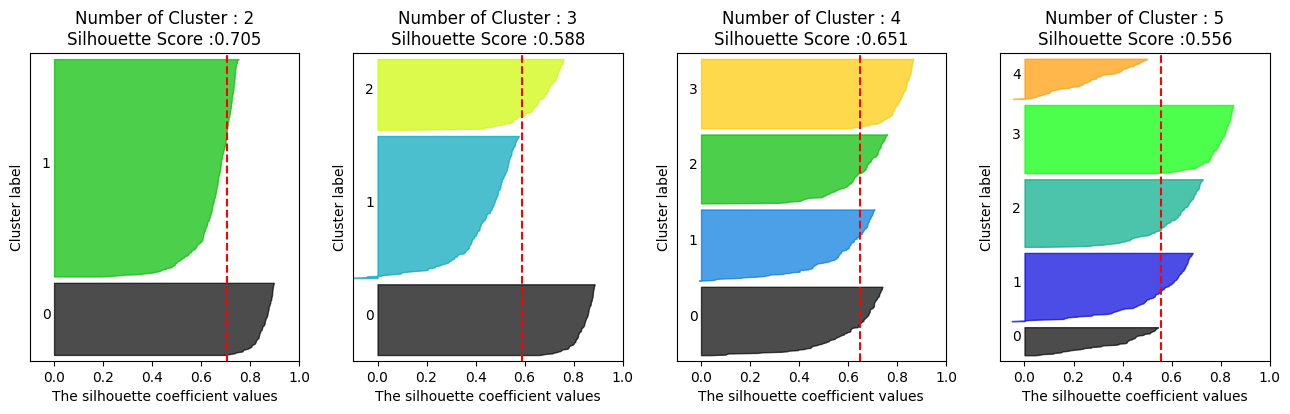

In [17]:
# make_blobs 통해 군집화를 위한 4개의 군집 중심의 500개 2차원 데이터 세트 생성
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10.0, 10.0), shuffle=True, random_state=1)

# 군집 개수가 2, 3, 4, 5개일 때의 군집별 실루엣 계수 평균값을 시각화
visualize_silhouette([2,3,4,5], X)

붓꽃 데이터를 K-평균으로 군집화할 경우에는 군집 개수를 2개로 하는 것이 가장 좋아 보임

실루엣 계수를 통한 K-평균 군집 평가 방법은 직관적으로 이해하기 쉽지만 각 데이터별로 다른 데이터와의 거리를 반복적으로 계산해야 하므로 데이터양이 늘어나면 수행 시간 증가함

이러한 경우 군집별로 임의의 데이터를 샘플링해 실루엣 계수를 평가하는 방안을 고려해야 함